In [1]:
import numpy as np
import pandas as pd
import splat
import popsims #plotting
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import splat.empirical as spe
from astropy.io import ascii
import glob
%matplotlib inline

Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database


In [2]:
SCHMIDT_COLOR_RELATIONS={'i-z': [(7.13, 0.23), (4.88, 0.15), [1.0, 2.9]],\
                        'i-J': [(5.17, 0.27), (2.61, 0.08), [2.5, 5,8]], \
                        'i-k': [(5.41, 0.30), (1.95, 0.07), [3.4, 7.5]]}

BEST_DICT={'2MASS J': {\
            'spt': [16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39], \
            'values': [10.36,10.77,11.15,11.46,11.76,12.03,12.32,12.77,13.51,13.69,14.18,14.94,14.90,14.46,14.56,15.25,14.54,14.26,13.89,14.94,15.53,16.78,17.18,17.75],\
            'rms': [0.30,0.30,0.42,0.34,0.18,0.15,0.21,0.24,0.28,0.25,0.60,0.20,0.13,0.71,0.5,0.12,0.06,0.16,0.36,0.12,0.27,0.76,0.51,0.5]},
        '2MASS H': {\
            'spt': [16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39], \
            'values': [9.76,10.14,10.47,10.74,11.00,11.23,11.41,11.82,12.45,12.63,13.19,13.82,13.77,13.39,13.62,14.39,13.73,13.67,13.57,14.76,15.48,16.70,17.09,17.51],\
            'rms': [0.30,0.31,0.43,0.35,0.23,0.21,0.25,0.29,0.3,0.30,0.62,0.31,0.20,0.73,0.5,0.18,0.15,0.24,0.40,0.24,0.37,0.78,0.5,0.5]},
       
        'PANSTARRS_R': {\
            'spt': [16,17,18,19,20,21,22,23,24,25,26,28], \
            'values': [15.37,16.76,17.74,18.14,18.37,18.74,19.02,19.61,20.60,20.74,21.21,22.88],\
            'rms': [0.43,0.50,0.51,0.37,0.31,0.28,0.29,0.39,0.56,0.37,0.78,0.5]},
        'PANSTARRS_I': {\
            'spt': [16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,35], \
            'values': [13.25,14.18,15.00,15.62,16.00,16.41,16.73,17.40,18.35,18.71,19.27,20.09,20.38,20.09,20.22,21.10,21.97,22.69],\
            'rms': [0.34,0.39,0.48,0.39,0.26,0.25,0.26,0.34,0.38,0.33,0.65,0.36,0.79,0.5,1.14,0.5,0.5,0.5]},
        'PANSTARRS_Z': {\
            'spt': [16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39], \
            'values': [12.27,12.98,13.61,14.17,14.52,14.93,15.30,15.88,16.68,16.94,17.35,18.18,18.10,17.69,17.98,18.84,18.26,18.08,18.02,19.20,19.82,21.17,21.52,21.82],\
            'rms': [0.32,0.34,0.45,0.37,0.25,0.23,0.24,0.21,0.33,0.29,0.62,0.26,0.22,0.73,0.5,0.21,0.23,0.25,0.39,0.22,0.32,0.78,0.52,0.5]},
        'PANSTARRS_Y': {\
            'spt': [16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39], \
            'values': [11.76,12.31,12.81,13.23,13.58,13.97,14.33,14.89,15.66,15.87,16.27,17.13,17.04,16.57,16.77,17.45,16.75,16.50,16.32,17.43,18.06,19.34,19.75,20.37],\
            'rms': [0.30,0.31,0.43,0.36,0.23,0.21,0.24,0.29,0.32,0.28,0.61,0.25,0.21,0.72,0.5,0.16,0.13,0.22,0.38,0.18,0.32,0.81,0.59,0.5]}}

kirkpatrick2020LF={'bin_center':np.flip(np.array([2025, 1875, 1725, 1575, 1425, 1275, 1125 , 975, 825, 675, 525])), 
                   'values':np.flip(np.array([0.72, 0.50,0.78, 0.81,0.94, 1.95, 1.11, 1.72, 1.99, 2.80, 4.24])), 
                   'unc':np.flip(([0.18, 0.17, 0.20,0.20, 0.22, 0.3, 0.25, 0.3, 0.32, 0.37, 0.70]))}
binedges= np.append(kirkpatrick2020LF['bin_center']-75,
                    kirkpatrick2020LF['bin_center'][-1]+75)

In [3]:
zhang_subds=pd.read_pickle(popsims.DATA_FOLDER+'/combined_sd_templates.pkl')
optical_stds=pd.read_pickle(popsims.DATA_FOLDER+'/combined_optical_templates.pkl')

In [4]:
BEST_COLORS=splat.SPT_COLORS_RELATIONS['best2018']#PANSTARRS_I-PANSTARRS_Z'

In [5]:
#BEST_COLORS

In [6]:
best_i_relation=interp1d(BEST_DICT['PANSTARRS_Z']['values'], \
                         BEST_DICT['PANSTARRS_Z']['spt'])
best_spt_i_relation=interp1d(BEST_DICT['PANSTARRS_Z']['spt'], \
                            BEST_DICT['PANSTARRS_Z']['values'])
best_iz_relation=interp1d(BEST_COLORS['colors']['PANSTARRS_Z-PANSTARRS_Y']['values'],
    BEST_COLORS['colors']['PANSTARRS_Z-PANSTARRS_Y']['spt'])

In [7]:

def read_filter(filtr):
    file = glob.glob('/users/caganze/research/splat/resources/filters/*{}*.txt'.format(filtr))[0]
    return ascii.read(file).to_pandas()
def absolute_mag_color_schmidt(x, color_key):
    #x is a float
    coeffs= SCHMIDT_COLOR_RELATIONS[color_key]
    #linear regression 
    a0= np.random.normal(coeffs[0][0], coeffs[0][-1], 1000)
    a1=np.random.normal(coeffs[1][0], coeffs[1][-1], 1000)
    y= a0+a1*x
    #trim                  
    y=y[np.logical_and(x >coeffs[-1][0], x <coeffs[-1][-1])]
    return np.nanmean(y), np.nanstd(y)

def rocio_mi_spt(spt):
    a, b, c=-0.005, 0.74,  6.7
    return a*(spt**2)+spt*b+c

def get_best_spt_from_color(iz):
    vls=BEST_COLORS['colors']['PANSTARRS_Z-PANSTARRS_Y']['values']
    mask=np.logical_or(iz< np.nanmin(vls), iz>np.nanmax(vls))
    res=np.zeros_like(iz)
    res[~mask]=best_iz_relation(iz[~mask])
    res[mask]=np.nan
    return res
    
     
def get_best_mag_from_spt(spt):
    vls=BEST_DICT['PANSTARRS_Z']['spt']
    mask=np.logical_or(spt< np.nanmin(vls), spt>np.nanmax(vls))
    res=np.zeros_like(spt)
    res[~mask]=best_spt_i_relation(spt[~mask])
    res[mask]=np.nan
    
    #fill in rocio's relation for earlier types
    mask_rocio=np.logical_and(spt >=10, spt <= 26)
    res[mask_rocio]=  rocio_mi_spt(spt[mask_rocio]-10)
    return res


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


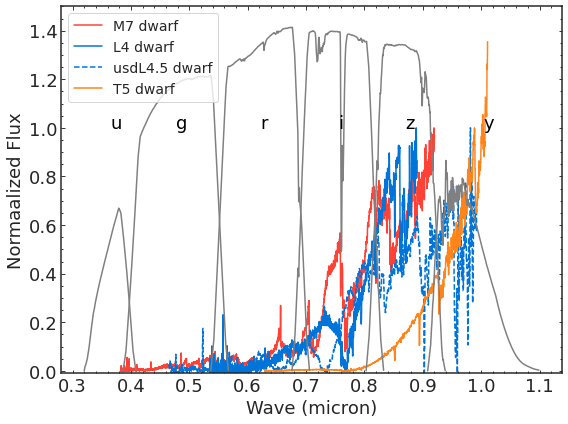

In [8]:
fig, ax=plt.subplots( figsize=(8, 6), sharey=True)
    
for typ, color in zip(['M70', 'L40',  'usdL4.5', 'T50'], \
                      ['#FF4136', '#0074D9', '#0074D9', '#FF851B']):
    if typ.startswith('usd'):
        s=zhang_subds[zhang_subds.sptype==typ].spectra.iloc[-1]
        s.normalize([0.85, 1.0])
        ax.step(s.wave, s.flux.value, label='{} dwarf'.format(typ.replace('0', '')),\
                c=color, linestyle='--')

            
    else: 
        s=optical_stds[optical_stds.sptype==typ].spectra.iloc[-1]
        s.normalize([0.85, 1.0])
        ax.step(s.wave, s.flux.value, label='{} dwarf'.format(typ.replace('0', '')), c=color)

    
for fltr in ['g', 'r',  'y', 'i', 'z', 'u']:
    g_fltr=read_filter('LSST.{}'.format(fltr))
    ax.plot(g_fltr.LAM, g_fltr.TRANSMISSION*3, c='grey')
    #ax1.plot(g_fltr.LAM, g_fltr.TRANSMISSION*3, c='grey')
    ax.text( np.nanmean(g_fltr.LAM), 1.0, fltr, c='k',  fontsize=18)
    #ax1.text( np.nanmean(g_fltr.LAM), 1.0, fltr, c='r', fontsize=14)




for a in[ax]:
    a.set(xlabel='Wave (micron)', ylabel='Normaalized Flux',  ylim=[-0.01, 1.50])
    a.legend(fontsize=14, loc='upper left')
    a.minorticks_on()
plt.tight_layout()
plt.savefig(popsims.FIGURES+'/lsst_filter_profiles.jpeg', rasterized=True)

In [29]:
lsst_dp0=pd.read_csv('/Volumes/lacie/popsimsdata/cone_search.csv')

In [49]:
lsst_dp0=lsst_dp0[(lsst_dp0.mag_i-lsst_dp0.mag_z)>0.0]

In [50]:
len(lsst_dp0[ lsst_dp0.truth_type==2])

1337022

In [84]:
spts=  get_best_spt_from_color((lsst_dp0.mag_z-lsst_dp0.mag_y).values)
mags=  get_best_mag_from_spt(spts)              
distances=popsims.get_distance(mags, lsst_dp0.mag_z.values)
teffs=np.array(spe.typeToTeff(spts)[0].value)

In [85]:
mask= distances<30

In [86]:
ncounts=dict(zip(kirkpatrick2020LF['bin_center'], np.histogram(teffs[mask], bins=binedges)[0]))

In [87]:
scale= popsims.scale_to_local_lf(teffs[np.logical_and.reduce([mask, teffs>1600, teffs<1700])])

In [88]:
scale

[0.0002604407865285151, 6.584789628272731e-05, 0.0007813223595855452]

In [104]:
len(spts[np.logical_and(mask, spts>30)])

20

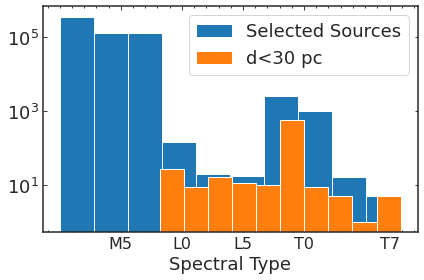

In [90]:
fig, ax=plt.subplots()
plt.hist(spts, log=True, label='Selected Sources')
plt.hist(spts[mask], log=True, label='d<30 pc')
ax.set(xlabel='Spectral Type')
ax.legend()
ax.minorticks_on()
ax.set_xticks([15, 20, 25, 30, 37])
ax.legend()
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T7'], fontsize=16)
plt.tight_layout()
plt.savefig(popsims.FIGURES+'/lsst_dpo_spectraltypes.pdf', rasterized=True)

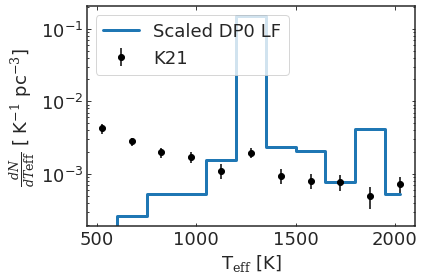

In [106]:
fig, ax=plt.subplots()
ax.errorbar(kirkpatrick2020LF['bin_center'], np.array(kirkpatrick2020LF['values'])*(10**-3),
             yerr= np.array(kirkpatrick2020LF['unc'])*(10**-3),
             fmt='o', color='k', label='K21')
ax.step(kirkpatrick2020LF['bin_center'], [ncounts[k]*scale[0]*1 for k in kirkpatrick2020LF['bin_center']],\
                                         label='Scaled DP0 LF', where='mid',  linewidth=3)
ax.legend(loc='upper left')
ax.set(yscale='log')
ax.set_xlabel(r'T$_\mathrm{eff}$ [K]', fontsize=18)
ax.set_ylabel(r'$\frac{dN}{dT\mathrm{eff}}$ [ K$^{-1}$ pc$^{-3}$]', fontsize=18)
plt.tight_layout()
plt.savefig(popsims.FIGURES+'/lsst_dpo_lf_30pc.pdf', rasterized=True)

In [92]:
from astropy.coordinates import  SkyCoord
import astropy.units as u
coord = SkyCoord(ra=62.0*u.degree, dec=-37.0*u.degree, frame='icrs')
area = (np.pi*(1.0*u.deg)**2).to(u.radian**2)

In [93]:
area

<Quantity 0.00095698 rad2>

In [94]:
#narro_field=popsims.Pointing(coord=coord)
#narro_field.mag_limits=dict(zip([k for k in  ['LSST_Z']],\
#         [(0,  20) for k in  ['LSST_Z']]))

In [95]:
sp_grid=spe.typeToTeff(kirkpatrick2020LF['bin_center'], reverse=True)[0]

In [96]:
ncounts

{525: 0,
 675: 1,
 825: 2,
 975: 2,
 1125: 6,
 1275: 568,
 1425: 9,
 1575: 8,
 1725: 3,
 1875: 16,
 2025: 2}

In [97]:
#vhbj

In [98]:
density={}
for k in np.round(kirkpatrick2020LF['bin_center']):
    spt=spe.typeToTeff(float(k), reverse=True)[0]
    
    if np.isnan(spt) or (spt >34):
        density[k]= np.nan
    else:
        dmin=1
        absmag=best_spt_i_relation(spt)
        dmax=popsims.get_distance(absmag, 25)
        print (absmag, dmax)
        vol= popsims.volume_calc(coord.galactic.l.radian, coord.galactic.b.radian,0.1, dmax, 350, kind='exp')
        density[k]=vol
        

17.796196963306322 275.9056584365026
18.107302890103934 239.07789423852668
17.05608125335212 387.95714022786944
16.622530562205377 473.6896412227917
15.708295639126696 721.6736893809714
15.132979194369947 940.5982385816698


In [99]:
np.nansum([density[k]*1e-3*(18000*u.deg**2).to(u.radian**2).value for k in density.keys()])

740483.3664511931